<a href="https://colab.research.google.com/github/TaicirCheikhrouhou/IDSproject-QGAN-AE-RL-FL/blob/main/DatasetExploring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1/IMPORT LIBRARIES

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

# 2/READ DATASET

In [16]:
train_url = "https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt"
df_ = pd.read_csv(train_url)
df= df_.copy()
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


In [17]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell'
,'su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate'
,'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])
df.columns = columns
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.040,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.060,0.070,0.000,0.000,1.000,1.000,0.000,0.000,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.090,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.050,0.060,0.000,0.000,1.000,1.000,0.000,0.000,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.050,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.000,287.147,2604.526,0.000,0.000,0.000,0.000,42908.000
src_bytes,125972.000,45567.101,5870354.481,0.000,0.000,44.000,276.000,1379963888.000
dst_bytes,125972.000,19779.271,4021285.112,0.000,0.000,0.000,516.000,1309937401.000
land,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,1.000
wrong_fragment,125972.000,0.023,0.254,0.000,0.000,0.000,0.000,3.000
urgent,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,3.000
hot,125972.000,0.204,2.150,0.000,0.000,0.000,0.000,77.000
num_failed_logins,125972.000,0.001,0.045,0.000,0.000,0.000,0.000,5.000
logged_in,125972.000,0.396,0.489,0.000,0.000,0.000,1.000,1.000
num_compromised,125972.000,0.279,23.942,0.000,0.000,0.000,0.000,7479.000


# 3/Data Cleaning

checking null values

In [19]:
df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


cheching for duplicates


In [20]:
df.duplicated().sum()

np.int64(0)

so far no null values and no duplicates

In [21]:
def unique_values(df, columns):
    """Prints unique values and their counts for columns in the df."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['udp' 'tcp' 'icmp']

Value Counts:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (70): ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
 

# 4/Classify our dataset in two classes (Attack&Normal)

In [22]:
attack_normal = []
for i in df.attack :
  if i == 'normal':
    attack_normal.append("normal")
  else:
    attack_normal.append("attack")
df['attack'] = attack_normal
df['attack'].unique()

array(['normal', 'attack'], dtype=object)

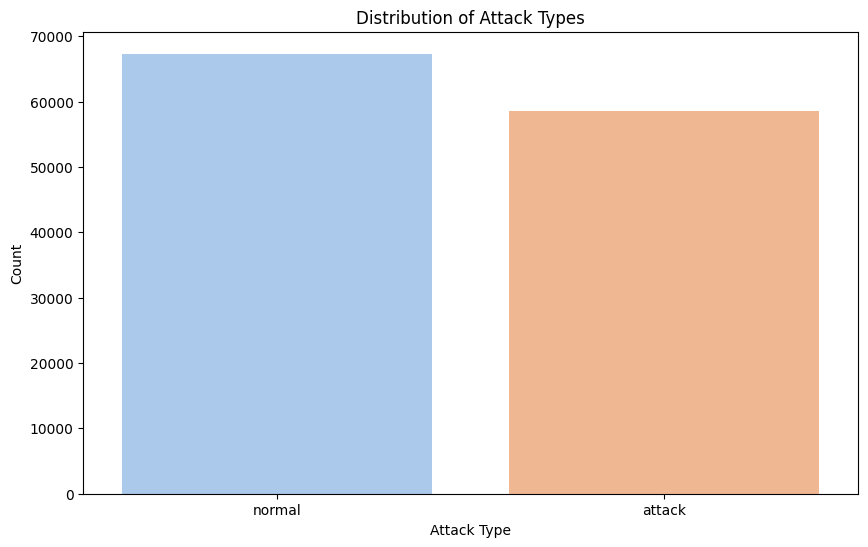

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=df['attack'], palette="pastel")

# Add labels and title
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Distribution of Attack Types")

# Show the plot
plt.show()

# 5/Protocole types


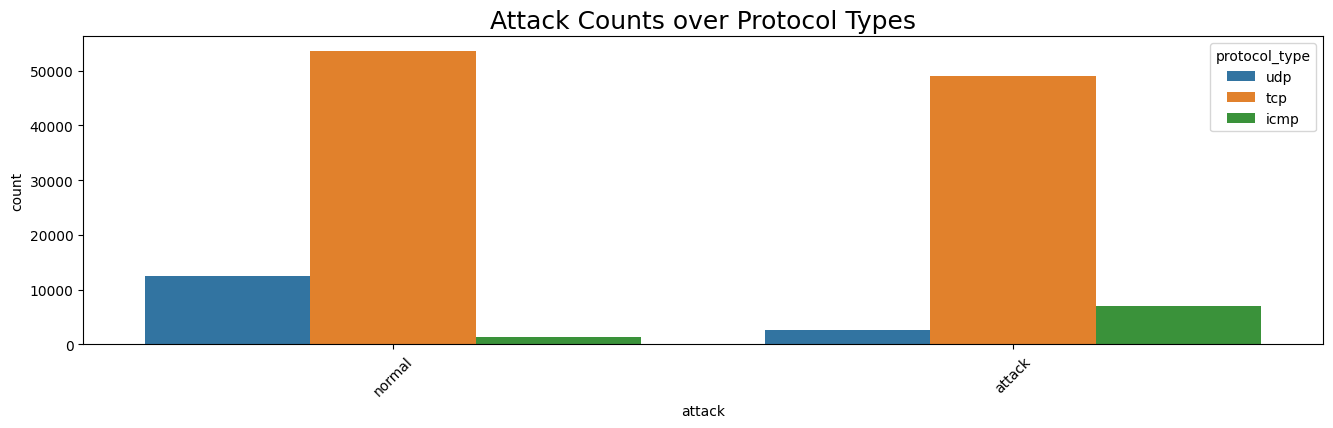

In [24]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=df,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':18})
plt.show()

In [25]:
df["protocol_type"].value_counts(normalize=True)

,proportion
protocol_type,
tcp,0.815
udp,0.119
icmp,0.066


# Finding most used services

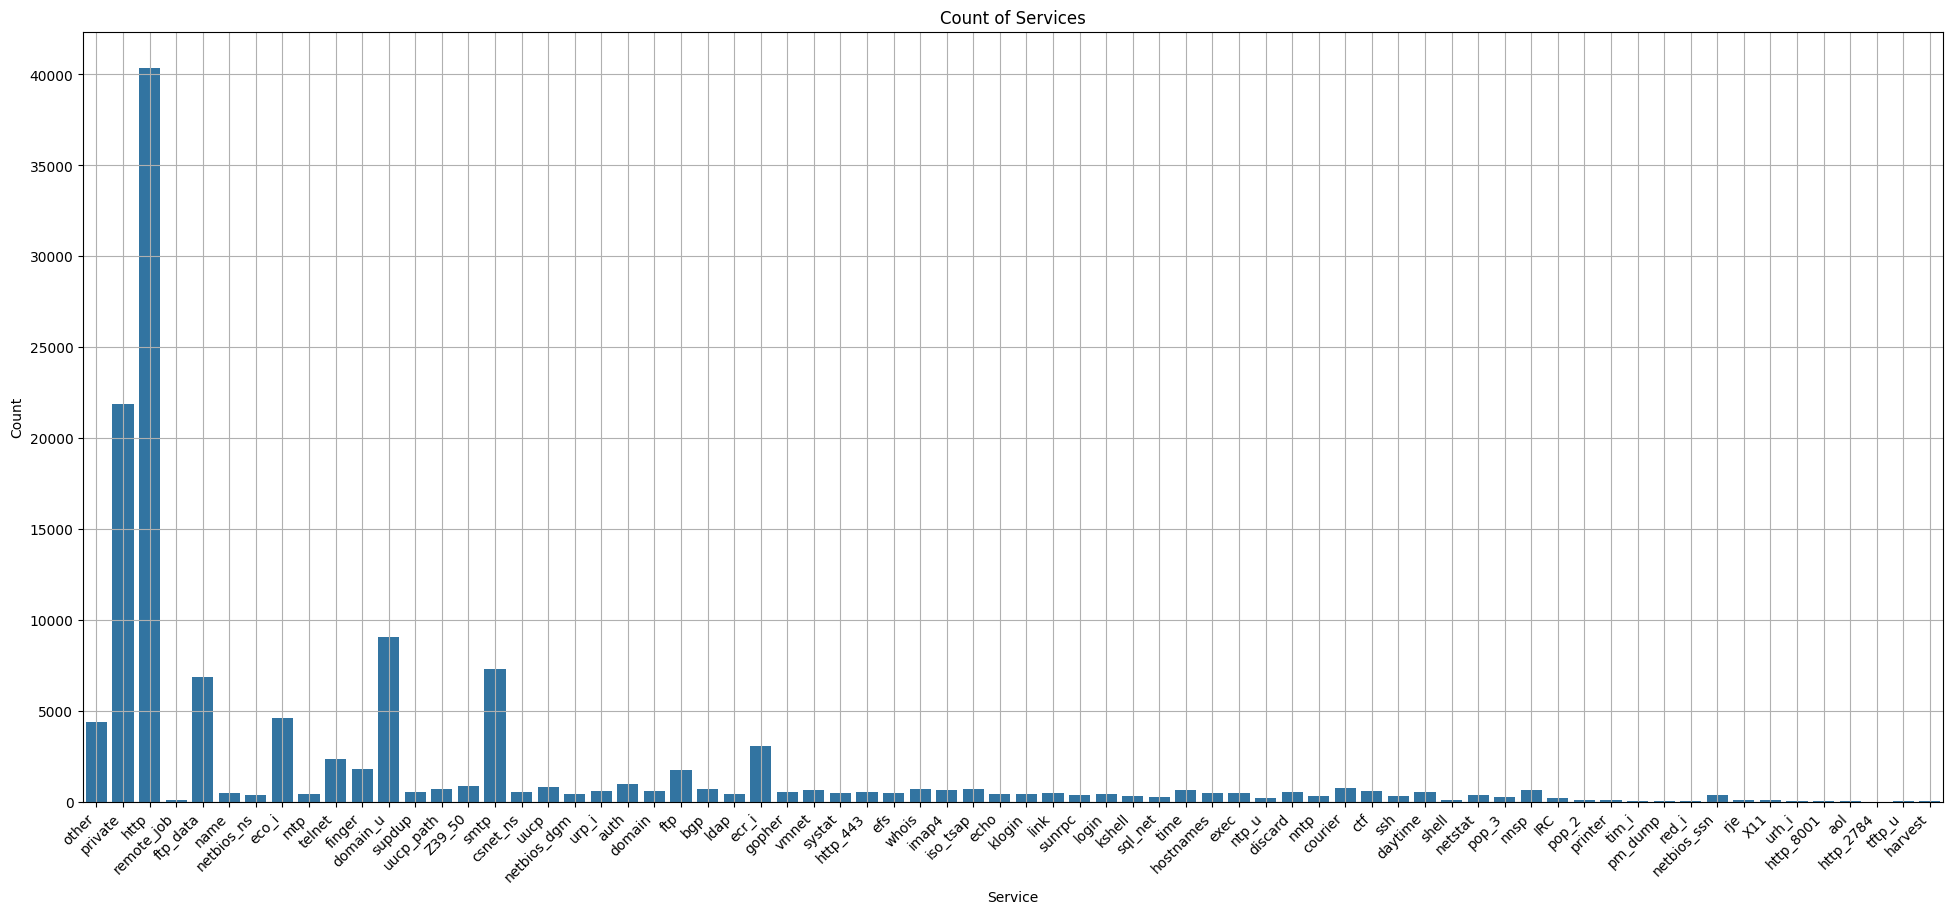

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 10))
ax = sns.countplot(x='service', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

# Their effect on attacks

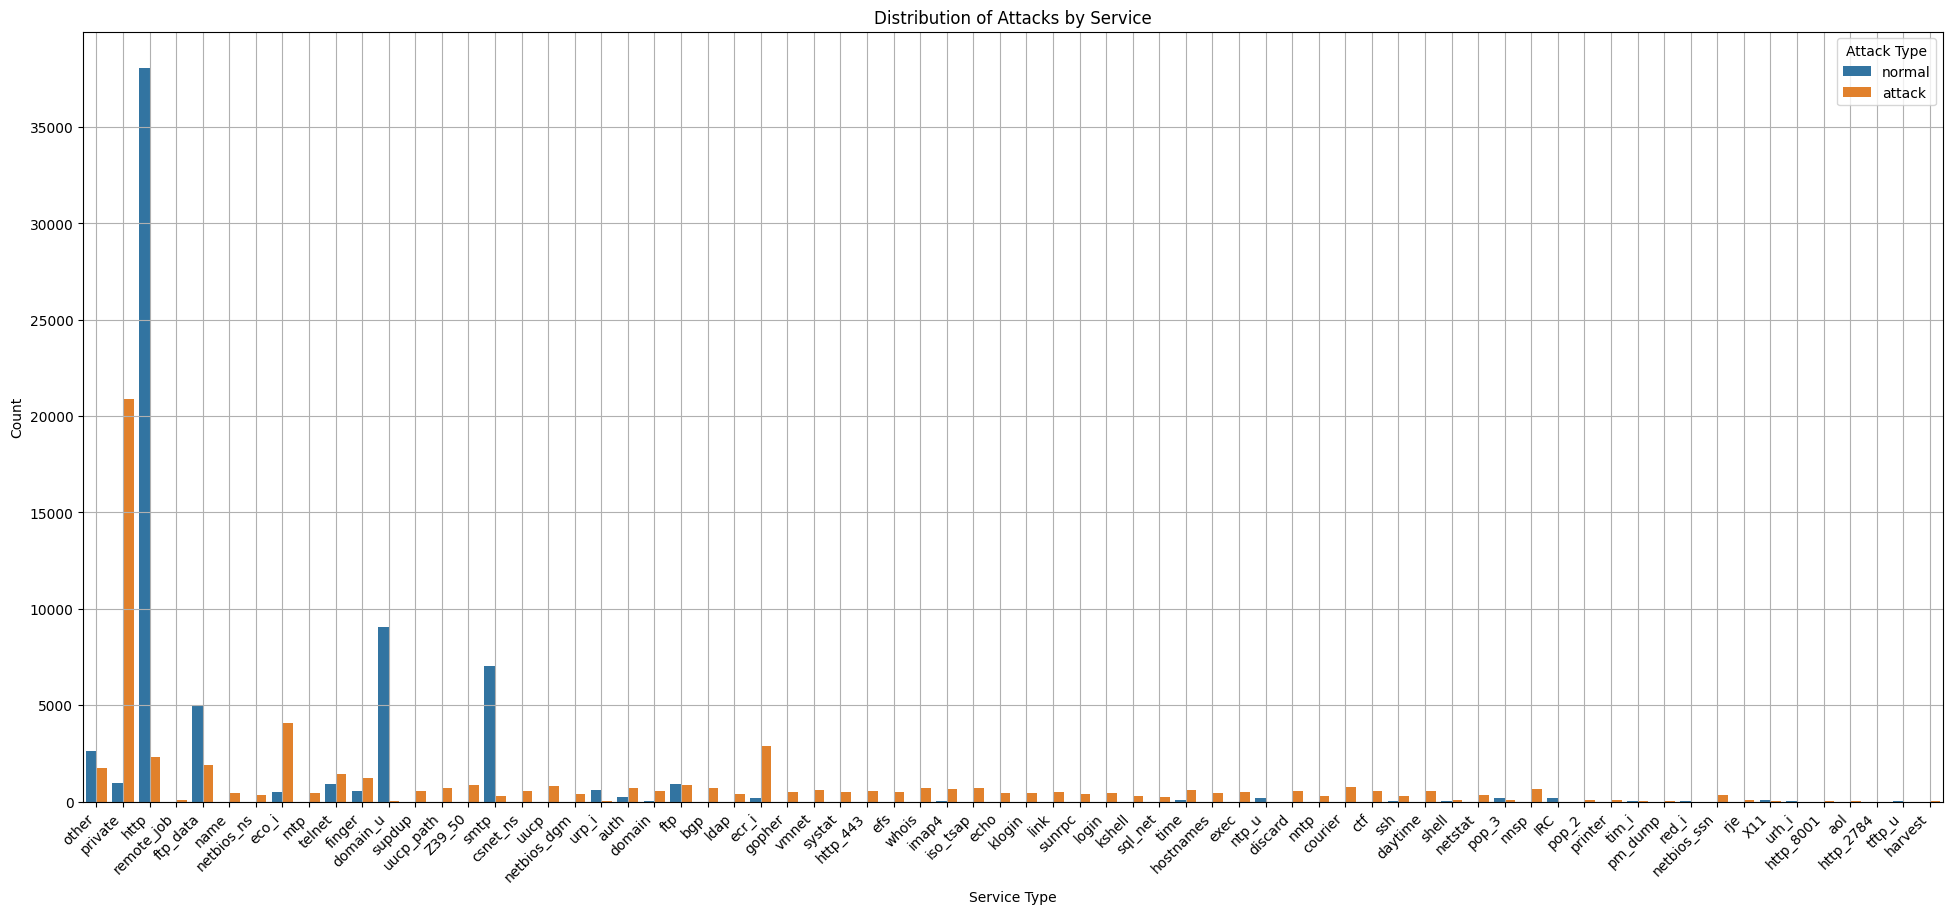

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 10))
ax = sns.countplot(x='service', hue='attack', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service Type')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

# Preprocessing

### *encoding

In [29]:
cat_features = df.select_dtypes(include='object').columns
cat_features
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    df[x]=le.fit_transform(df[x])

### *split dataset

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop(["attack"], axis=1)
y = df["attack"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=43)
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

### *Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Engineering & Feature Selection

In [32]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)


,0
src_bytes,0.566
service,0.468
dst_bytes,0.439
flag,0.366
diff_srv_rate,0.362
same_srv_rate,0.361
dst_host_srv_count,0.334
dst_host_same_srv_rate,0.309
logged_in,0.288
dst_host_serror_rate,0.288


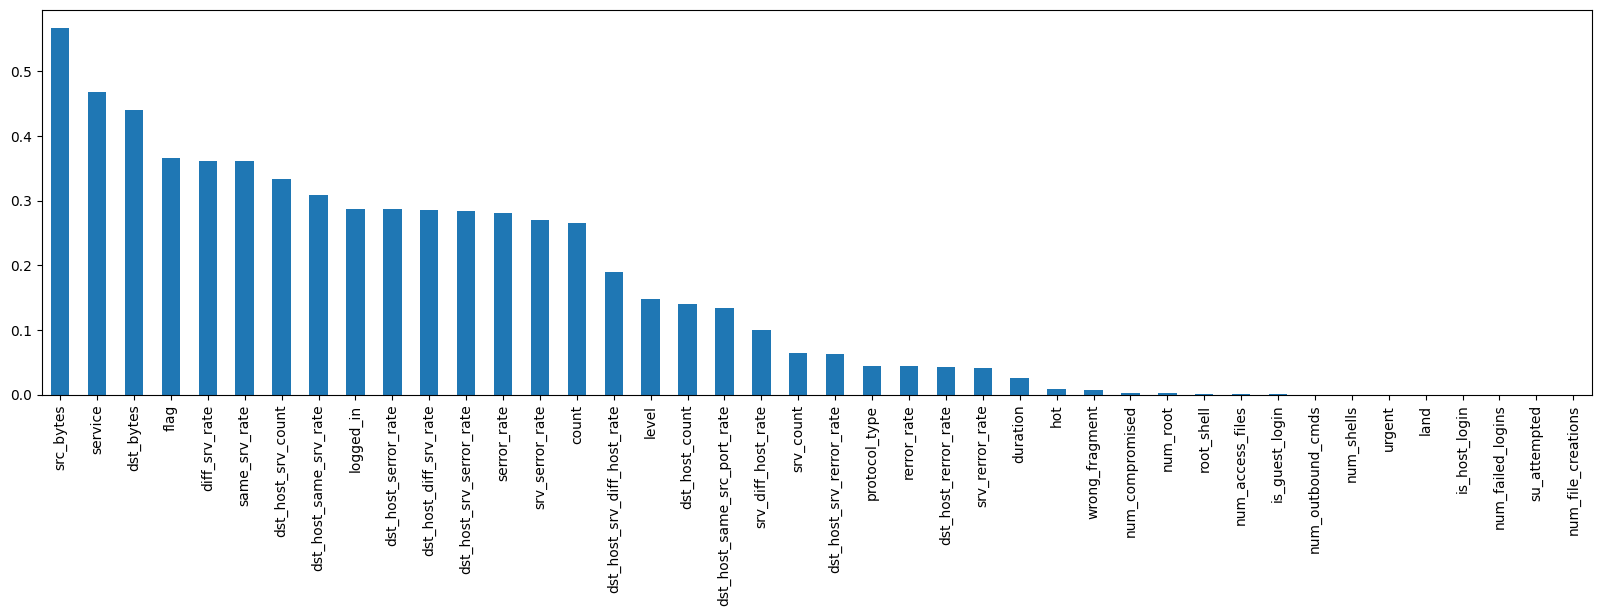

In [33]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

In [34]:
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train, y_train)
train_index[Select_features.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

# Model Choice: Logistic_Model

In [35]:
from sklearn.linear_model import LogisticRegression
Logistic_model = LogisticRegression(random_state=42)
Logistic = Logistic_model.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
eval_metric(Logistic_model, X_train, y_train, X_test, y_test)


Test_Set
[[8672  165]
 [ 249 9810]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8837
           1       0.98      0.98      0.98     10059

    accuracy                           0.98     18896
   macro avg       0.98      0.98      0.98     18896
weighted avg       0.98      0.98      0.98     18896


Train_Set
[[48889   904]
 [ 1412 55871]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     49793
           1       0.98      0.98      0.98     57283

    accuracy                           0.98    107076
   macro avg       0.98      0.98      0.98    107076
weighted avg       0.98      0.98      0.98    107076



In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

model = Logistic_model
coefficients = model.coef_[0]

feats = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(coefficients)
})

feats_sorted = feats.sort_values(by='Importance', ascending=False)
print(feats_sorted)


                        Feature  Importance
25              srv_serror_rate       3.806
22                        count       2.445
27              srv_rerror_rate       2.298
41                        level       1.842
7                wrong_fragment       1.505
24                  serror_rate       1.478
31               dst_host_count       1.330
28                same_srv_rate       1.257
26                  rerror_rate       1.224
9                           hot       1.125
23                    srv_count       1.053
21               is_guest_login       1.047
32           dst_host_srv_count       1.038
35  dst_host_same_src_port_rate       1.012
38     dst_host_srv_serror_rate       0.997
11                    logged_in       0.926
3                          flag       0.883
33       dst_host_same_srv_rate       0.746
1                 protocol_type       0.681
39         dst_host_rerror_rate       0.657
15                     num_root       0.623
12              num_compromised 

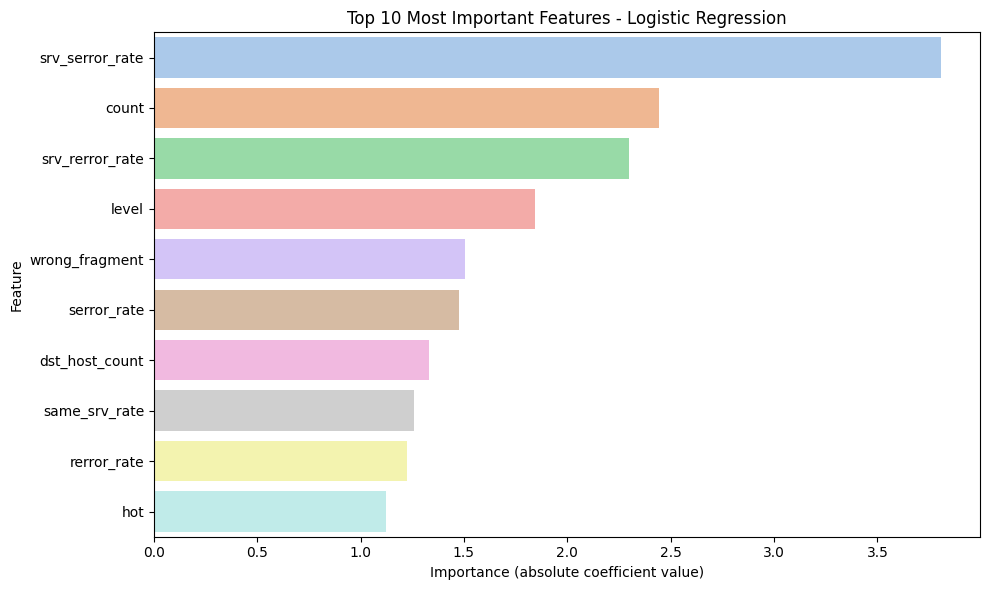

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

coefficients = Logistic_model.coef_[0]
feats = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(coefficients)
})
top_feats = feats.sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_feats, palette='pastel')
plt.title("Top 10 Most Important Features - Logistic Regression")
plt.xlabel("Importance (absolute coefficient value)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


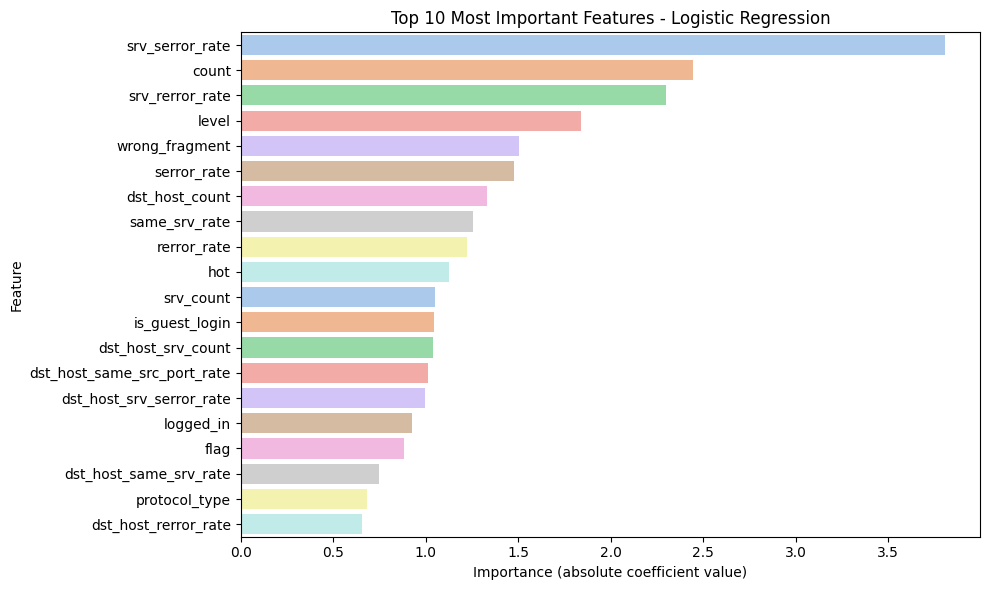

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

coefficients = Logistic_model.coef_[0]
feats = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(coefficients)
})

top_feats = feats.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_feats, palette='pastel')
plt.title("Top 10 Most Important Features - Logistic Regression")
plt.xlabel("Importance (absolute coefficient value)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
